<a href="https://www.kaggle.com/code/helayahyaoui/nlp-twitter-sentiment-analysis?scriptVersionId=100587633" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer #convert the text into feature vector 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/twitter-sentiment-analysis-hatred-speech'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/twitter-sentiment-analysis-hatred-speech/train.csv
../input/twitter-sentiment-analysis-hatred-speech/test.csv


# Dataset

In [2]:
dataset= pd.read_csv('../input/twitter-sentiment-analysis-hatred-speech/train.csv')

In [3]:
len(dataset)

31962

In [4]:
features = dataset.drop(columns='label', axis=1)
targets=dataset['label']

# Data cleaning

**Notes:**

**Tokenizing**
                                                        
Tokenization is a basic process that breaks a sentence into a group of words, punctuations, numbers, and alphanumeric that are called tokens.

**Lemmatization / Stemming**

Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.

**Python String isalpha() Method**
The **isalpha()** method returns True if all the characters are alphabet letters (a-z).

In [5]:
porter = PorterStemmer()
lem = WordNetLemmatizer()

In [6]:
def data_clean (data):
    #lowerCase
    data=data.lower()
    
    #Remove punctuation
    tokenizer = RegexpTokenizer(r'\w+') #  get rid of punctuation 
    data= tokenizer.tokenize(data) #Tokenizing step
 
    # Removing stop words
    stopW = stopwords.words("english")
    data= [newdata for newdata in data if newdata not in stopW]
        

    #stemming 
    data=[porter.stem(newdata) for newdata in data]
    #lemmatization 
    data =[lem.lemmatize(newdata) for newdata in data]

    return " ".join(data)

In [7]:
features['tweet'][3]

'#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '

In [8]:
features['tweet'].head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [9]:
features['tweet'] =features['tweet'].apply(data_clean)

In [10]:
features['tweet'].head(3)

0    user father dysfunct selfish drag kid dysfunct...
1    user user thank lyft credit use caus offer whe...
2                                       bihday majesti
Name: tweet, dtype: object

In [11]:
data=features['tweet'].values

# TF-IDF vector

In [12]:
Vector = TfidfVectorizer()
Vector.fit(data)
data = Vector.transform(data)

In [13]:
print(data)
print(len(data.toarray()))

  (0, 32543)	0.07960113128652567
  (0, 27342)	0.33565401522483085
  (0, 26590)	0.23917420543386603
  (0, 17142)	0.22559278703087277
  (0, 10924)	0.1843095677725651
  (0, 9608)	0.7960071501267583
  (0, 9331)	0.3245092233367844
  (1, 33731)	0.3446343116692027
  (1, 32647)	0.3207126866997975
  (1, 32543)	0.1418258149077011
  (1, 32536)	0.19308147956942784
  (1, 30619)	0.15032306668642828
  (1, 23512)	0.3446343116692027
  (1, 22485)	0.2588761831975703
  (1, 18977)	0.33064105810578576
  (1, 12636)	0.35456268307519095
  (1, 8861)	0.36855593663860786
  (1, 7672)	0.2946988084432431
  (1, 6007)	0.2342429534356565
  (2, 19164)	0.8811019834830613
  (2, 4160)	0.47292631001268587
  (3, 32518)	0.5255549325914844
  (3, 31170)	0.4017649548953023
  (3, 30146)	0.4504780599891836
  (3, 20360)	0.5082073817058786
  :	:
  (31958, 19366)	0.3280609741125668
  (31958, 18145)	0.13556387671764164
  (31958, 15494)	0.2786195919867257
  (31958, 14341)	0.22681399300342342
  (31958, 12565)	0.25439845158576097
  (3195

In [14]:
len(targets)

31962

# Split

In [15]:
trainX, testX, trainY, testY = train_test_split(data, targets, test_size=0.2, stratify=targets, random_state=2)

# Model:  Logistic Regression

In [16]:
LogiRE = LogisticRegression()
LogiRE.fit(trainX, trainY)
predTrain =LogiRE.predict(trainX)

In [17]:
ACCtrain=[]
ACCtest=[]
accuracyTrain = accuracy_score(predTrain, trainY)
print('Score of accuracy for the training data: ', accuracyTrain)
predTest = LogiRE.predict(testX)
accuracyTest = accuracy_score(predTest, testY)
print('Accuracy score for the test data : ', accuracyTest)
ACCtrain.append(round(accuracyTrain, 3))
ACCtest.append(round(accuracyTest, 3))

Score of accuracy for the training data:  0.9534201572216355
Accuracy score for the test data :  0.9488503050211169


# --------------- Undersampling and Oversampling ---------------

# Class imbalance problem

0    29720
1     2242
Name: label, dtype: int64


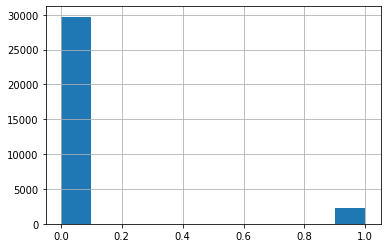

In [18]:
dataset['label'].hist()
print(dataset['label'].value_counts())

**=> Class imbalance problem**

so to solve this problem we have two choices. The first is to increase the number of samples belonging to class "1" (**Oversampling**). The second is to decrease the number of samples belonging to class "0" (**under-sampling**)

# Undersampling

**sampling_strategy** argument to **“majority”** will undersample the majority class determined by the class with the largest number of examples.

In [19]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
newdata, newtargets = undersample.fit_resample(data, targets)

In [20]:
# example of random undersampling to balance the class distribution
from collections import Counter
print(Counter(newtargets))

Counter({0: 2242, 1: 2242})


In [21]:
print(len(newdata.toarray()))

4484


In [22]:
print(len(newtargets))

4484


**Split**

In [23]:
trainX, testX, trainY, testY = train_test_split(newdata, newtargets, test_size=0.2, stratify=newtargets, random_state=2)

In [24]:
LogiRE = LogisticRegression()
LogiRE.fit(trainX, trainY)
predTrain =LogiRE.predict(trainX)

In [25]:
accuracyTrain = accuracy_score(predTrain, trainY)
print('Score of accuracy for the training data: ', accuracyTrain)
predTest = LogiRE.predict(testX)
accuracyTest = accuracy_score(predTest, testY)
print('Accuracy score for the test data : ', accuracyTest)
ACCtrain.append(round(accuracyTrain, 3))
ACCtest.append(round(accuracyTest, 3))

Score of accuracy for the training data:  0.9531642040702537
Accuracy score for the test data :  0.8840579710144928


# Oversampling

**sampling_strategy** argument that can be set to **“minority”** to automatically balance the minority class with majority class or classes.

In [26]:
# define undersample strategy
oversample = RandomOverSampler(sampling_strategy='minority')
newdata, newtargets = oversample.fit_resample(data, targets)

In [27]:
# example of random undersampling to balance the class distribution
from collections import Counter
print(Counter(newtargets))

Counter({0: 29720, 1: 29720})


**Split**

In [28]:
trainX, testX, trainY, testY = train_test_split(newdata, newtargets, test_size=0.2, stratify=newtargets, random_state=2)

In [29]:
LogiRE = LogisticRegression()
LogiRE.fit(trainX, trainY)
predTrain =LogiRE.predict(trainX)

In [30]:
accuracyTrain = accuracy_score(predTrain, trainY)
print('Score of accuracy for the training data: ', accuracyTrain)
predTest = LogiRE.predict(testX)
accuracyTest = accuracy_score(predTest, testY)
print('Accuracy score for the test data : ', accuracyTest)
ACCtrain.append(round(accuracyTrain, 3))
ACCtest.append(round(accuracyTest, 3))

Score of accuracy for the training data:  0.9806948183041723
Accuracy score for the test data :  0.9734185733512786


# Comparison 

In [31]:
# insert(idx, value)
ACCtrain.insert(0, 'Training')
ACCtest.insert(0, 'Test')

In [32]:
from tabulate import tabulate

table = [['Steps','Original LR acc', 'LR acc after undersampling', 'LR acc after oversampling'], ACCtrain, ACCtest]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════╤═══════════════════╤══════════════════════════════╤═════════════════════════════╕
│ Steps    │   Original LR acc │   LR acc after undersampling │   LR acc after oversampling │
╞══════════╪═══════════════════╪══════════════════════════════╪═════════════════════════════╡
│ Training │             0.953 │                        0.953 │                       0.981 │
├──────────┼───────────────────┼──────────────────────────────┼─────────────────────────────┤
│ Test     │             0.949 │                        0.884 │                       0.973 │
╘══════════╧═══════════════════╧══════════════════════════════╧═════════════════════════════╛
